# Módulo 07 - Tarefa 02

#### 1) Carregue a base e garanta que a base está como deveria.

Considere a base que você ajustou na lição passada. Carregue-a. Caso ainda haja alguma pendência, ajuste - lembre-se de que o scikitlearn não recebe variáveis em formato string, somente numéricas, e não aceita '*missings*'. 

- Separe 70% da base para treinamento e 30% para validação. Cada uma dessas partes terá dois objetos, um armazenando a variável resposta ```mau```e outro armazenando as variáveis explicativas (lembrando: sem variáveis string, já com as dummies).

In [1]:
#Primeiramente iremos importar as bibliotecas
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [2]:
#Importando o dataframe
df = pd.read_csv('dados_encoded.csv')
df.head()

,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,...,educacao_Secondary / secondary special,estado_civil_Married,estado_civil_Separated,estado_civil_Single / not married,estado_civil_Widow,tipo_residencia_House / apartment,tipo_residencia_Municipal apartment,tipo_residencia_Office apartment,tipo_residencia_Rented apartment,tipo_residencia_With parents
0,0,1,1,0,58.832877,3.106849,1,0,0,0,...,1,1,0,0,0,1,0,0,0,0
1,1,0,1,0,52.356164,8.358904,1,0,1,1,...,1,0,0,1,0,1,0,0,0,0
2,1,0,1,0,52.356164,8.358904,1,0,1,1,...,1,0,0,1,0,1,0,0,0,0
3,0,1,1,0,46.224658,2.106849,1,1,1,1,...,0,1,0,0,0,1,0,0,0,0
4,1,1,0,0,29.230137,3.021918,1,0,0,0,...,0,1,0,0,0,1,0,0,0,0


In [3]:
#Separando as variaveis explicativas da variavel target
X = df.drop('mau', axis=1)
y = df.mau

In [4]:
#Separando entre treino e teste

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=100)

#### 2) Vamos para o modelo:

1. Defina um objeto com a função da árvore de decisão vista em aula.
2. Treine o modelo com os dados que você separou para treinamento.
3. Visualize a árvore. Talvez você queira aumentar um pouco a figura.
4. Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" e "reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.
5. Calcule a acurácia na base de treinamento

In [5]:
clf = DecisionTreeClassifier(random_state= 100)
clf.fit(X_train,y_train)

DecisionTreeClassifier(random_state=100)

In [6]:
clf.score(X_train, y_train)

0.991076791076791

In [7]:
y_chapeu_train = clf.predict(X_train)
y_chapeu_train

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

[Text(0.6154689915853948, 0.9814814814814815, 'tempo_emprego <= 2.848\ngini = 0.044\nsamples = 11655\nvalue = [11392, 263]\nclass = aprovado'),
 Text(0.3564717010585157, 0.9444444444444444, 'tempo_emprego <= 2.845\ngini = 0.059\nsamples = 4279\nvalue = [4149, 130]\nclass = aprovado'),
 Text(0.2298796533063749, 0.9074074074074074, 'idade <= 30.175\ngini = 0.058\nsamples = 4273\nvalue = [4145, 128]\nclass = aprovado'),
 Text(0.06622264509990486, 0.8703703703703703, 'educacao_Incomplete higher <= 0.5\ngini = 0.116\nsamples = 438\nvalue = [411, 27]\nclass = aprovado'),
 Text(0.050237868696479546, 0.8333333333333334, 'idade <= 30.137\ngini = 0.084\nsamples = 388\nvalue = [371, 17]\nclass = aprovado'),
 Text(0.03653663177925785, 0.7962962962962963, 'estado_civil_Single / not married <= 0.5\ngini = 0.071\nsamples = 381\nvalue = [367, 14]\nclass = aprovado'),
 Text(0.018268315889628926, 0.7592592592592593, 'tempo_emprego <= 0.693\ngini = 0.042\nsamples = 283\nvalue = [277, 6]\nclass = aprovado

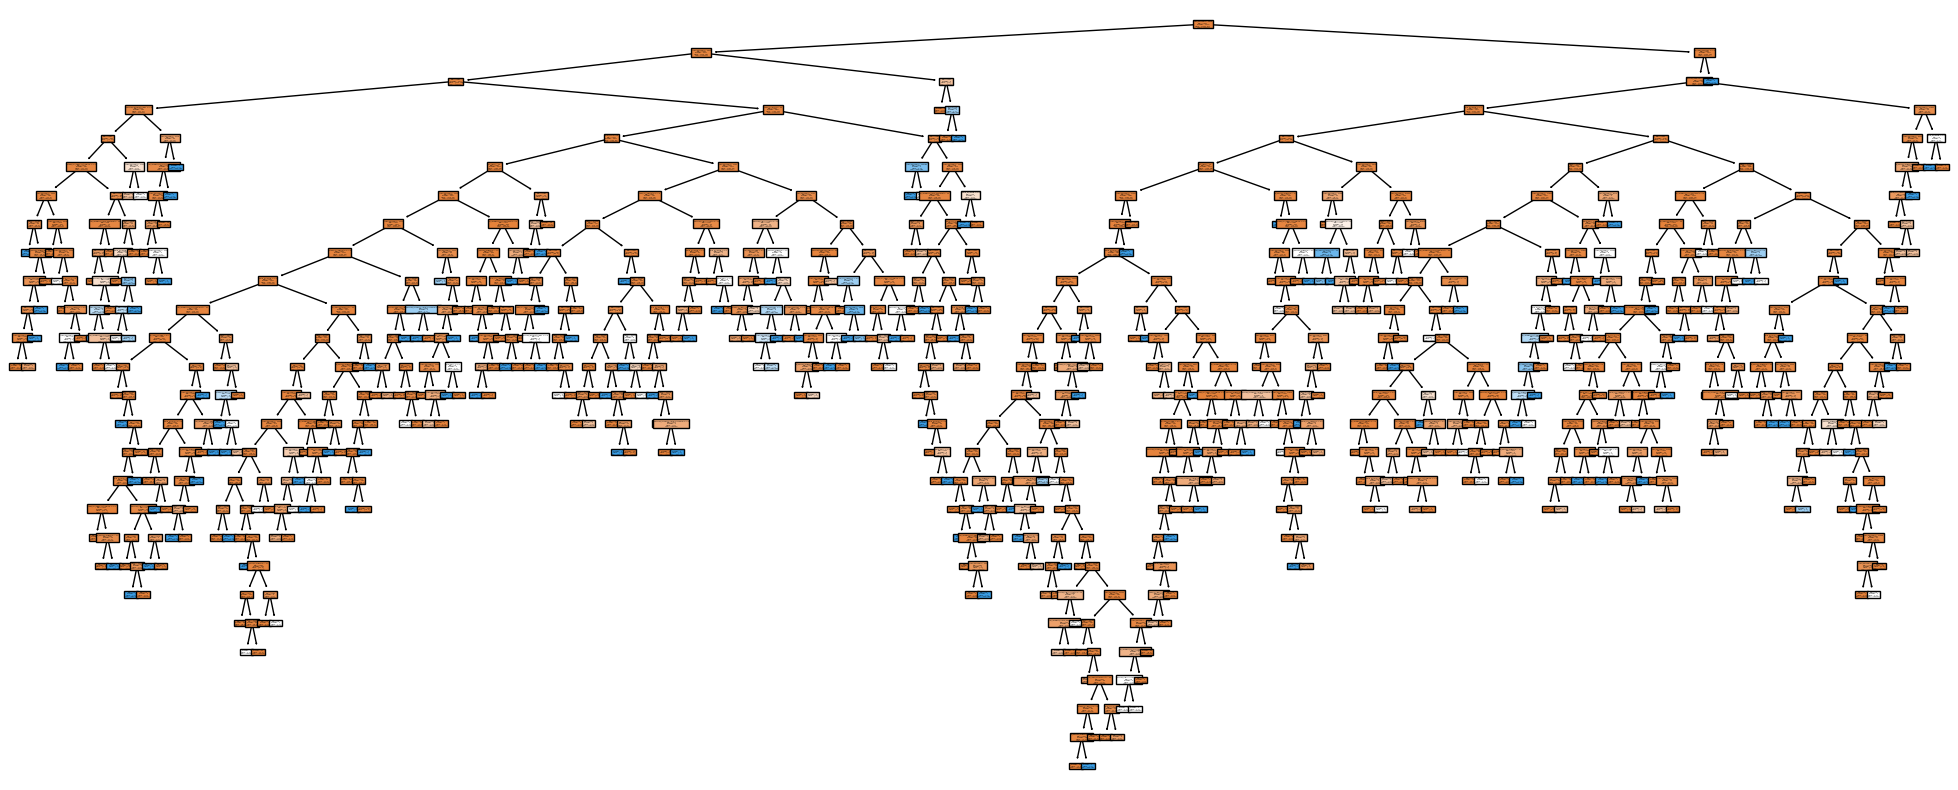

In [8]:
#Visualizando a arvore
plt.figure(figsize=(25, 10))
plot_tree(clf,
          filled=True,
          class_names=['aprovado', 'reprovado'],
          feature_names=X_train.columns)

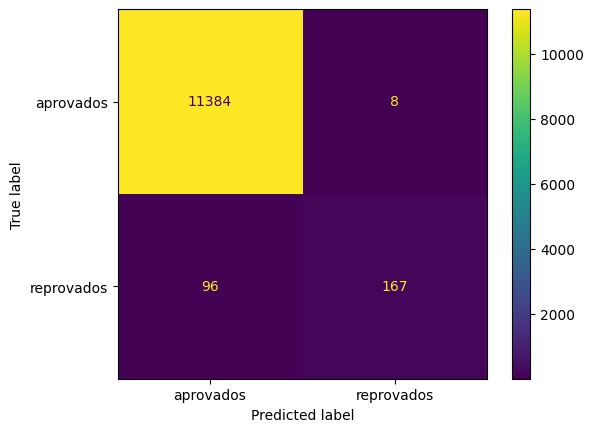

In [9]:
cm = confusion_matrix(y_train, y_chapeu_train)
cm_plot = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['aprovados', 'reprovados'])
cm_plot.plot()

In [10]:
accuracy_score(y_train, y_chapeu_train)

0.991076791076791

#### 3) Vamos avaliar o modelo na base de testes

1. Classifique a base de teste de acordo com a árvore que você treinou no item 2.
2. Produza a visualização da matriz de confusão para a base de teste.
3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.
4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?
5. Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

In [11]:
#1.)
y_chapeu_test = clf.predict(X_test)
y_chapeu_test

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

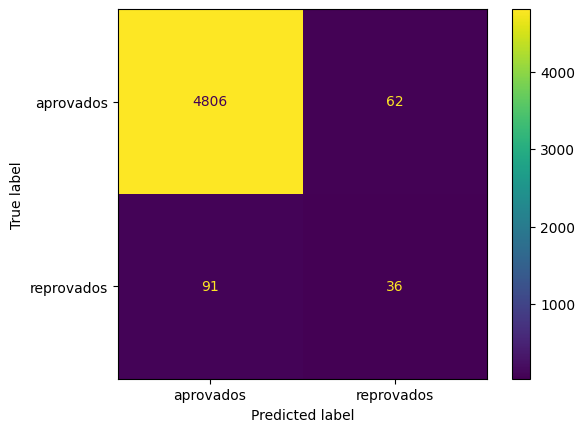

In [12]:
#2.)
cm_test = confusion_matrix(y_test, y_chapeu_test)
cm_test_plot = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=['aprovados', 'reprovados'])
cm_test_plot.plot()

In [13]:
#3.)
accuracy_score(y_test, y_chapeu_test)

0.9693693693693693

In [14]:
#4.)
#Primeiramente iremos criar e treinar uma nova arvore
clf2 = DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, random_state=123)
clf2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, random_state=123)

[Text(0.5458579881656804, 0.9545454545454546, 'tempo_emprego <= 2.848\ngini = 0.044\nsamples = 11655\nvalue = [11392, 263]\nclass = aprovado'),
 Text(0.2515717455621302, 0.8636363636363636, 'tempo_emprego <= 2.845\ngini = 0.059\nsamples = 4279\nvalue = [4149, 130]\nclass = aprovado'),
 Text(0.24565458579881658, 0.7727272727272727, 'idade <= 30.175\ngini = 0.058\nsamples = 4273\nvalue = [4145, 128]\nclass = aprovado'),
 Text(0.10281065088757396, 0.6818181818181818, 'educacao_Incomplete higher <= 0.5\ngini = 0.116\nsamples = 438\nvalue = [411, 27]\nclass = aprovado'),
 Text(0.0695266272189349, 0.5909090909090909, 'idade <= 30.137\ngini = 0.084\nsamples = 388\nvalue = [371, 17]\nclass = aprovado'),
 Text(0.06360946745562131, 0.5, 'estado_civil_Single / not married <= 0.5\ngini = 0.071\nsamples = 381\nvalue = [367, 14]\nclass = aprovado'),
 Text(0.03254437869822485, 0.4090909090909091, 'tempo_emprego <= 0.693\ngini = 0.042\nsamples = 283\nvalue = [277, 6]\nclass = aprovado'),
 Text(0.01775

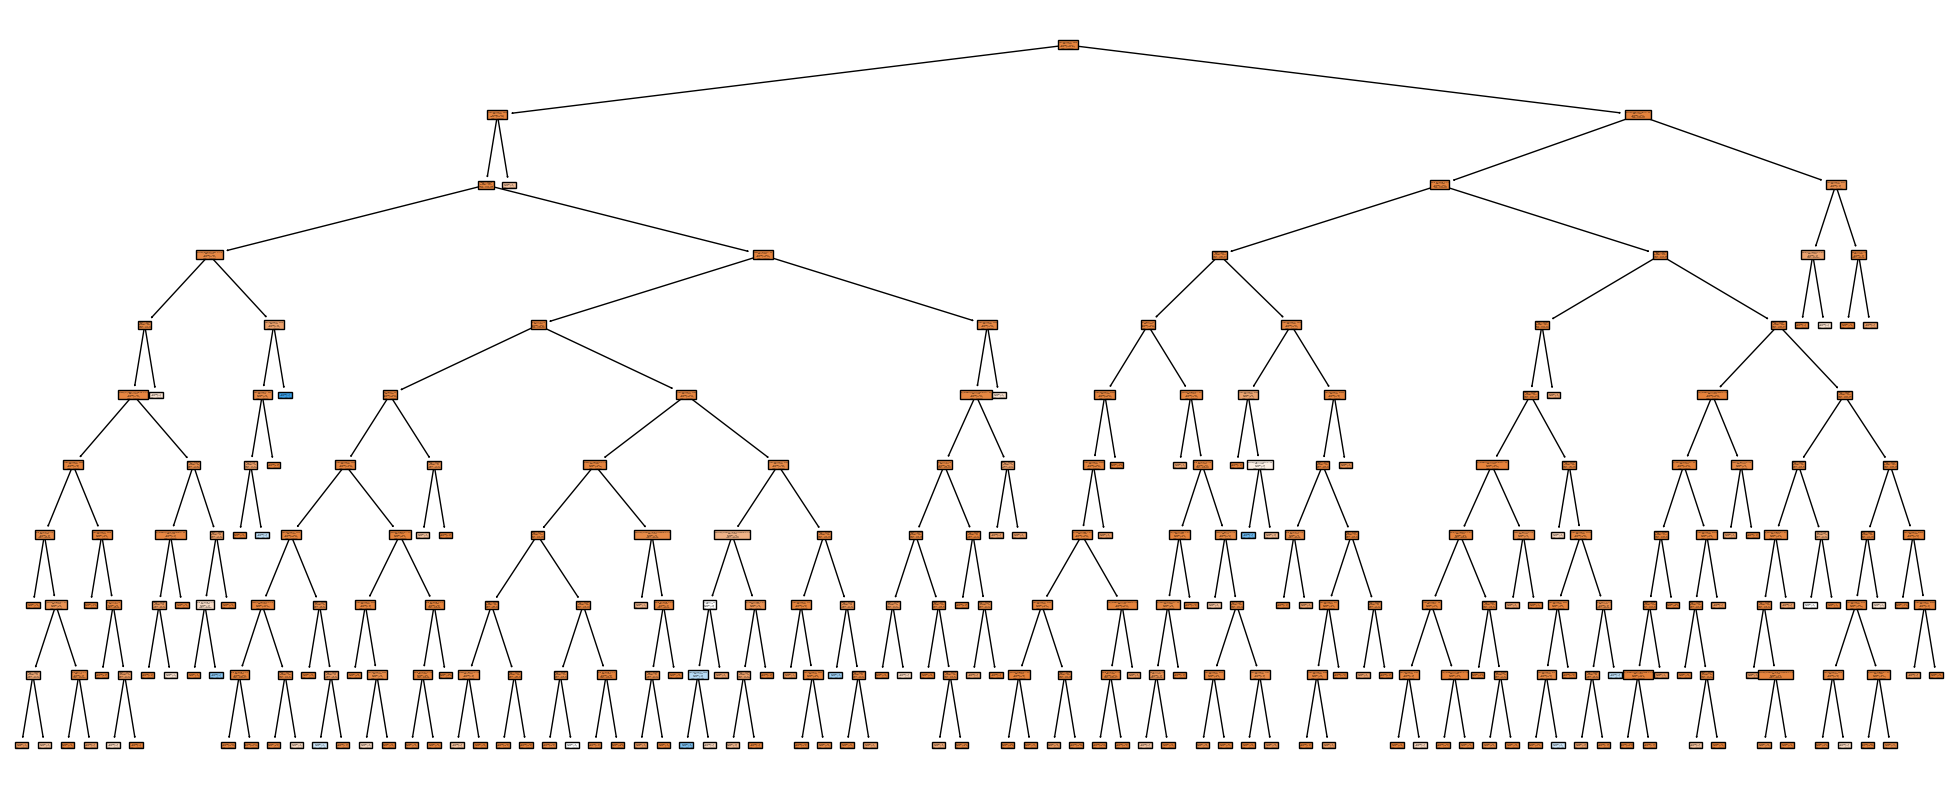

In [15]:
plt.figure(figsize=(25, 10))
plot_tree(clf2,
          filled=True,
          class_names=['aprovado', 'reprovado'],
          feature_names=X_train.columns)

In [16]:
y_chapeu_train_2 = clf2.predict(X_train)
y_chapeu_train_2

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

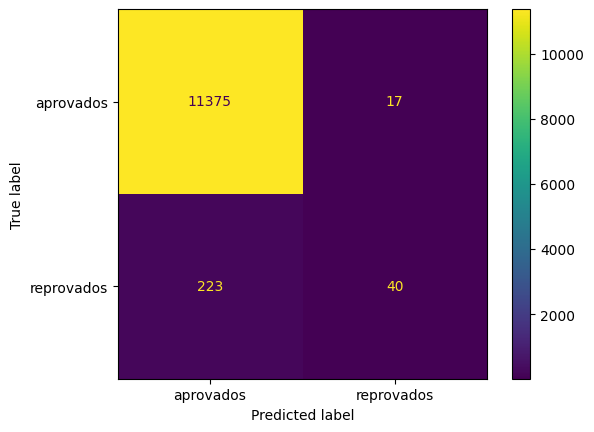

In [17]:
cm_2 = confusion_matrix(y_train, y_chapeu_train_2)
cm_plot_2 = ConfusionMatrixDisplay(confusion_matrix=cm_2, display_labels=['aprovados', 'reprovados'])
cm_plot_2.plot()

In [18]:
accuracy_score(y_train, y_chapeu_train_2)

0.9794079794079794

In [19]:
print(f'A proporção de proponentes classificados como maus é {(40/(40+223+11375+17))*100}%.')

A proporção de proponentes classificados como maus é 0.3432003432003432%.


In [24]:
#5.)
previsoes_todas_boas = ['aprovados'] * len(df)
acuracia = accuracy_score(y, previsoes_todas_boas)
print(f'A Acurácia do modelo ao classificar todas as instâncias como "aprovados" é: {acuracia:.2f}')

A Acurácia do modelo ao classificar todas as instâncias como "aprovados" é: 0.00
